In [21]:
import numpy as np
from pygsp import graphs, plotting
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
matplotlib.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (20, 7)

Create a Random Sensor Network

In [2]:
G = graphs.Sensor(N=512,distribute=True, seed=42)
G.compute_fourier_basis()

Created labeled signal

In [3]:
label_signal = np.copysign(np.ones(G.N), G.U[:, 3])

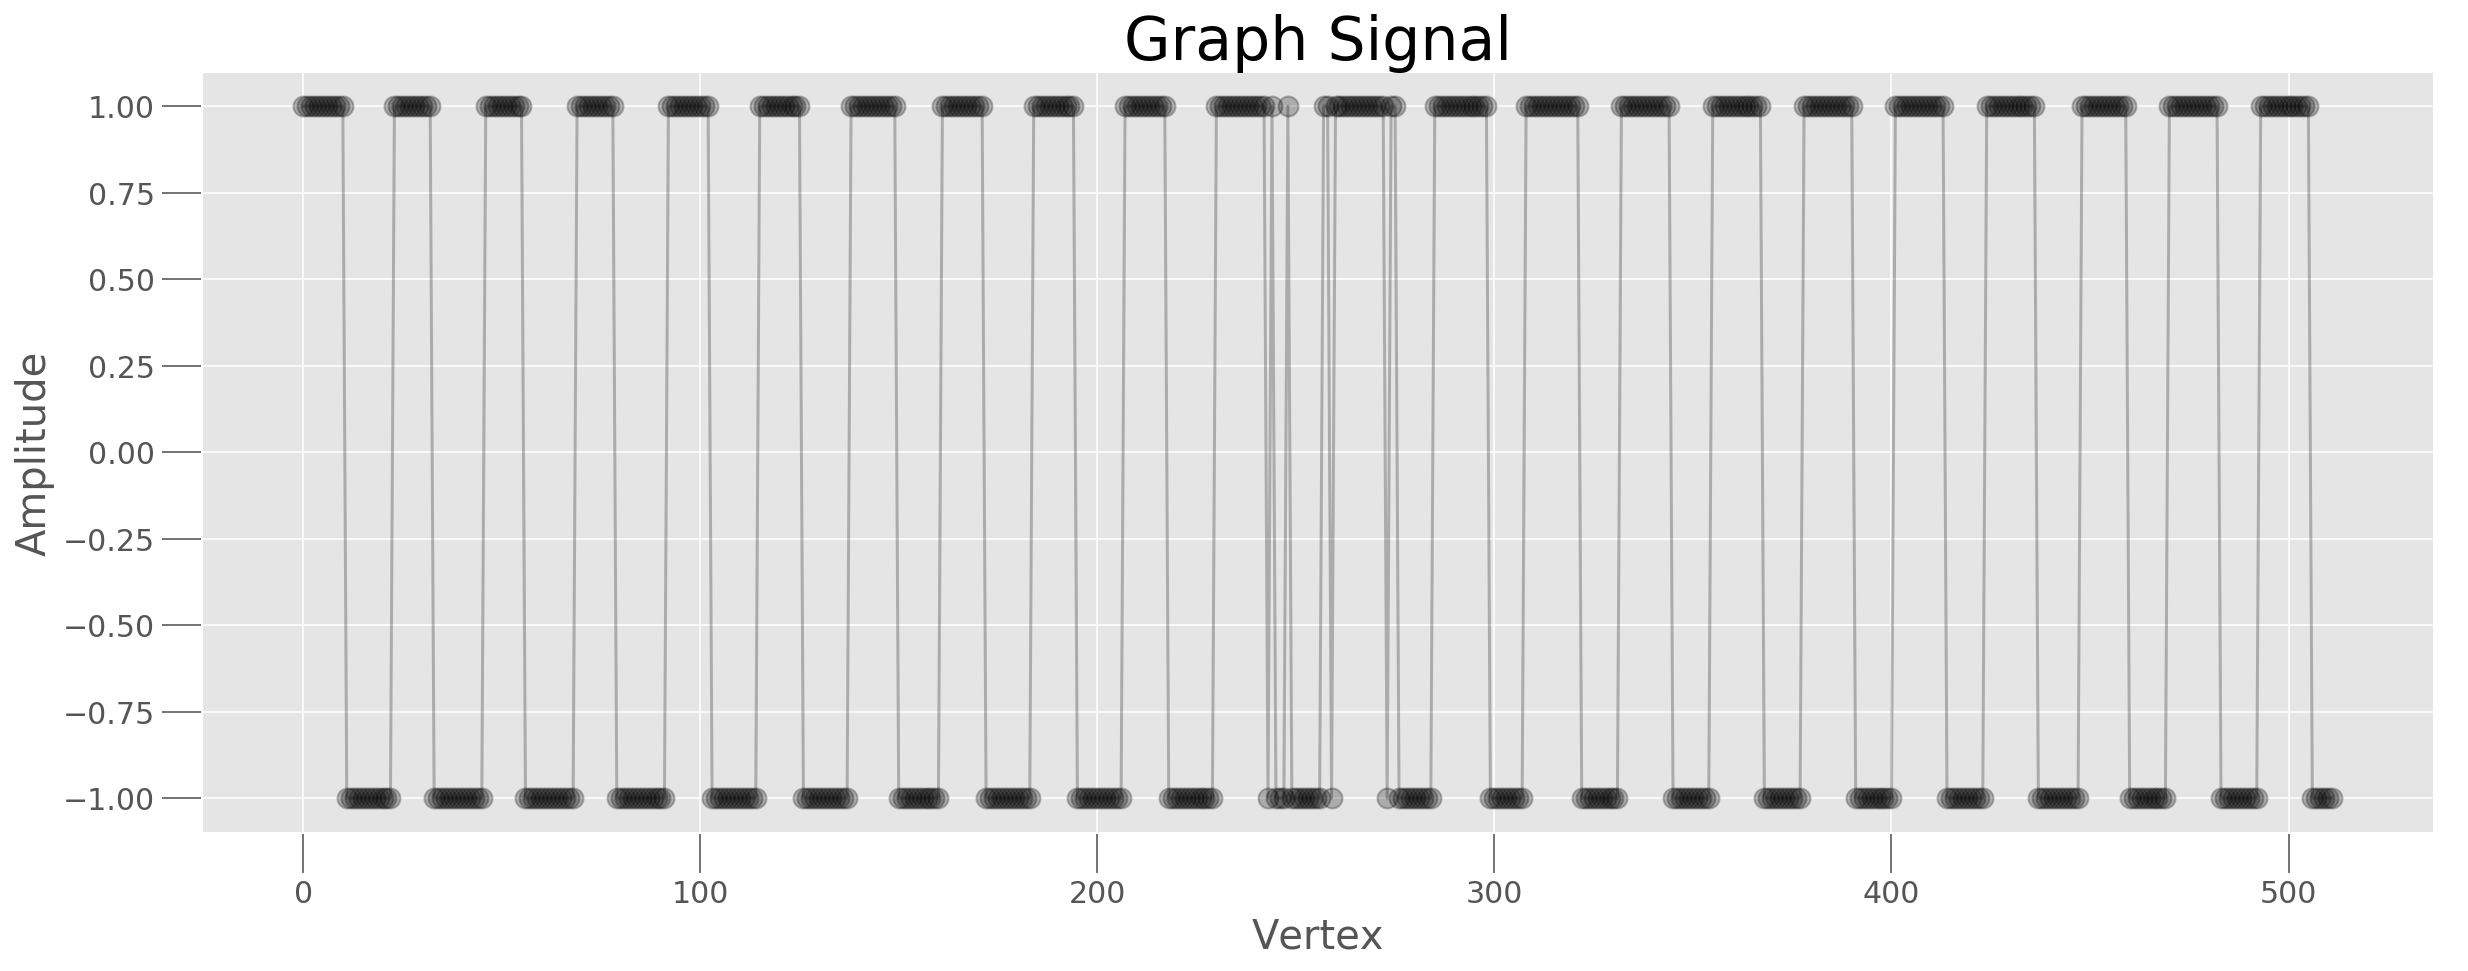

In [42]:
plt.figure(figsize=(20,7))
plt.plot(label_signal,'-ok',markersize=10,alpha=0.25)
plt.title('Graph Signal',size=30)
plt.xlabel('Vertex').set_size(20)
plt.ylabel('Amplitude').set_size(20)
plt.tick_params(size=20,labelsize=15)

The following network is what we will be working with. Here is the graph signal on the random network:

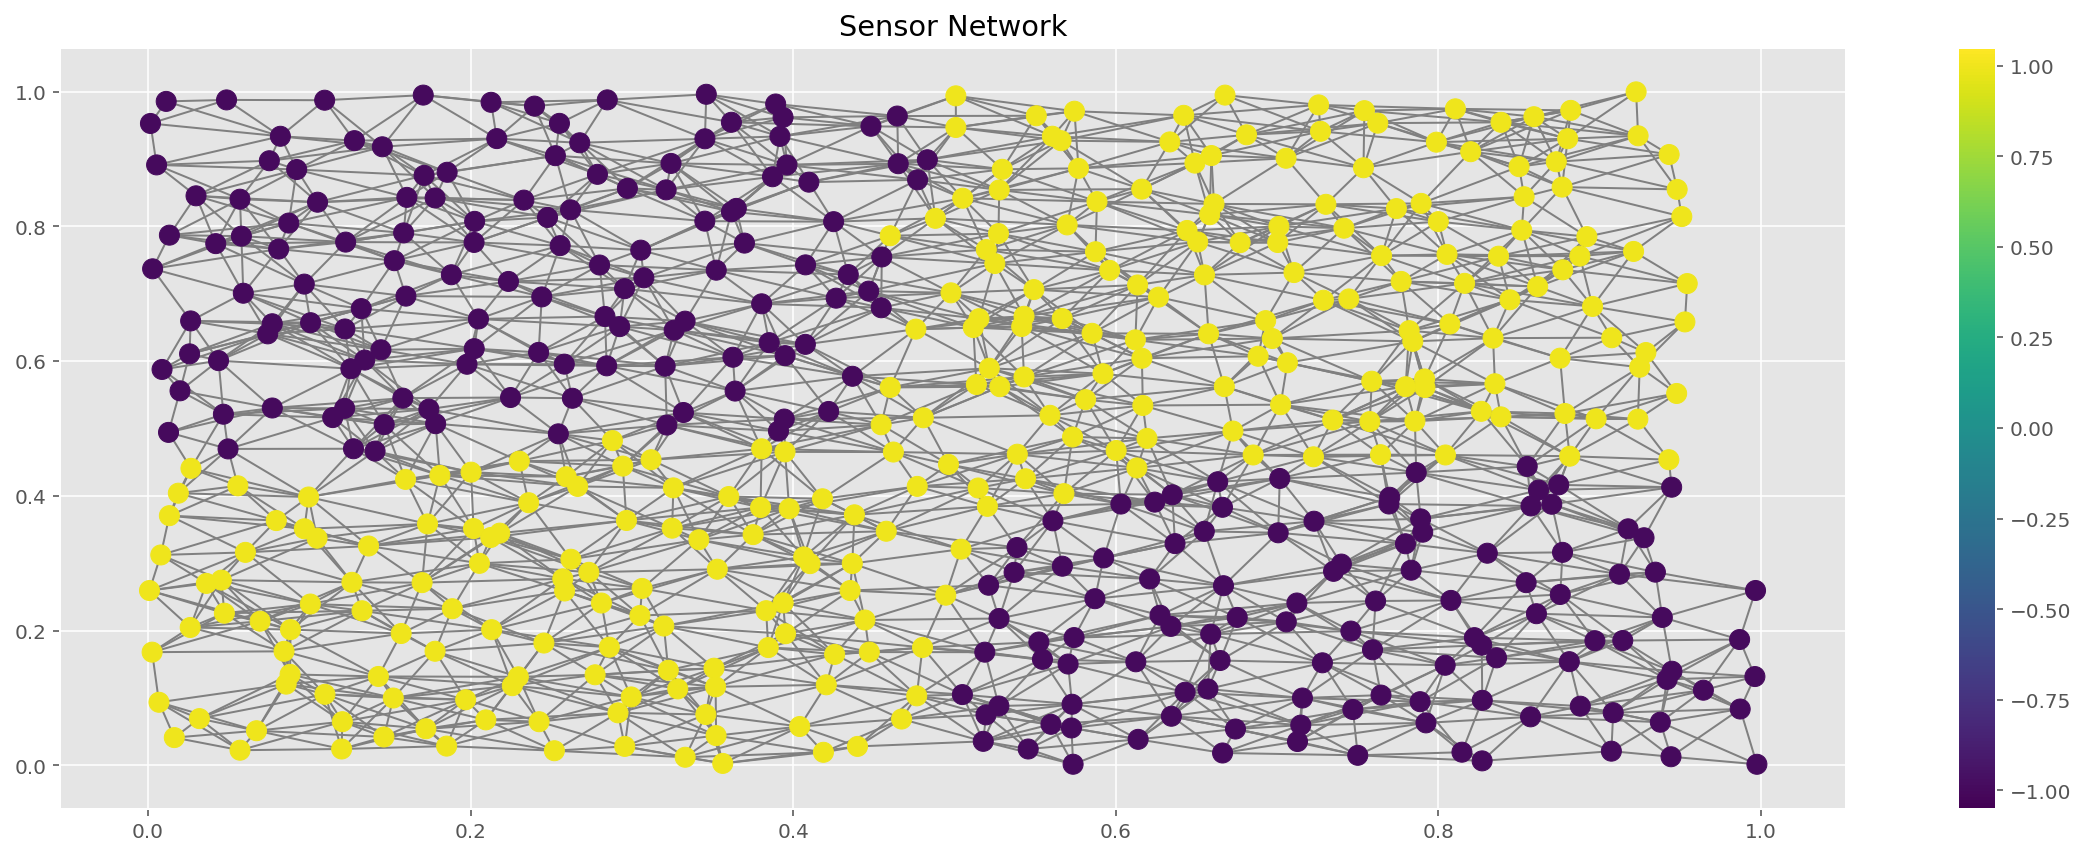

In [23]:
G.plot_signal(label_signal,plot_name='Sensor Network')

Create a mask to simulate the noise on the graph signal:

In [28]:
rs = np.random.RandomState(42)
M = rs.rand(G.N)
M = (M > 0.6).astype(float)  # Probability of having no label on a vertex.

Let us apply the mask to the graph signal

In [29]:
sigma = 0.1
subsampled_noisy_label_signal = M * (label_signal + sigma * rs.standard_normal(G.N))

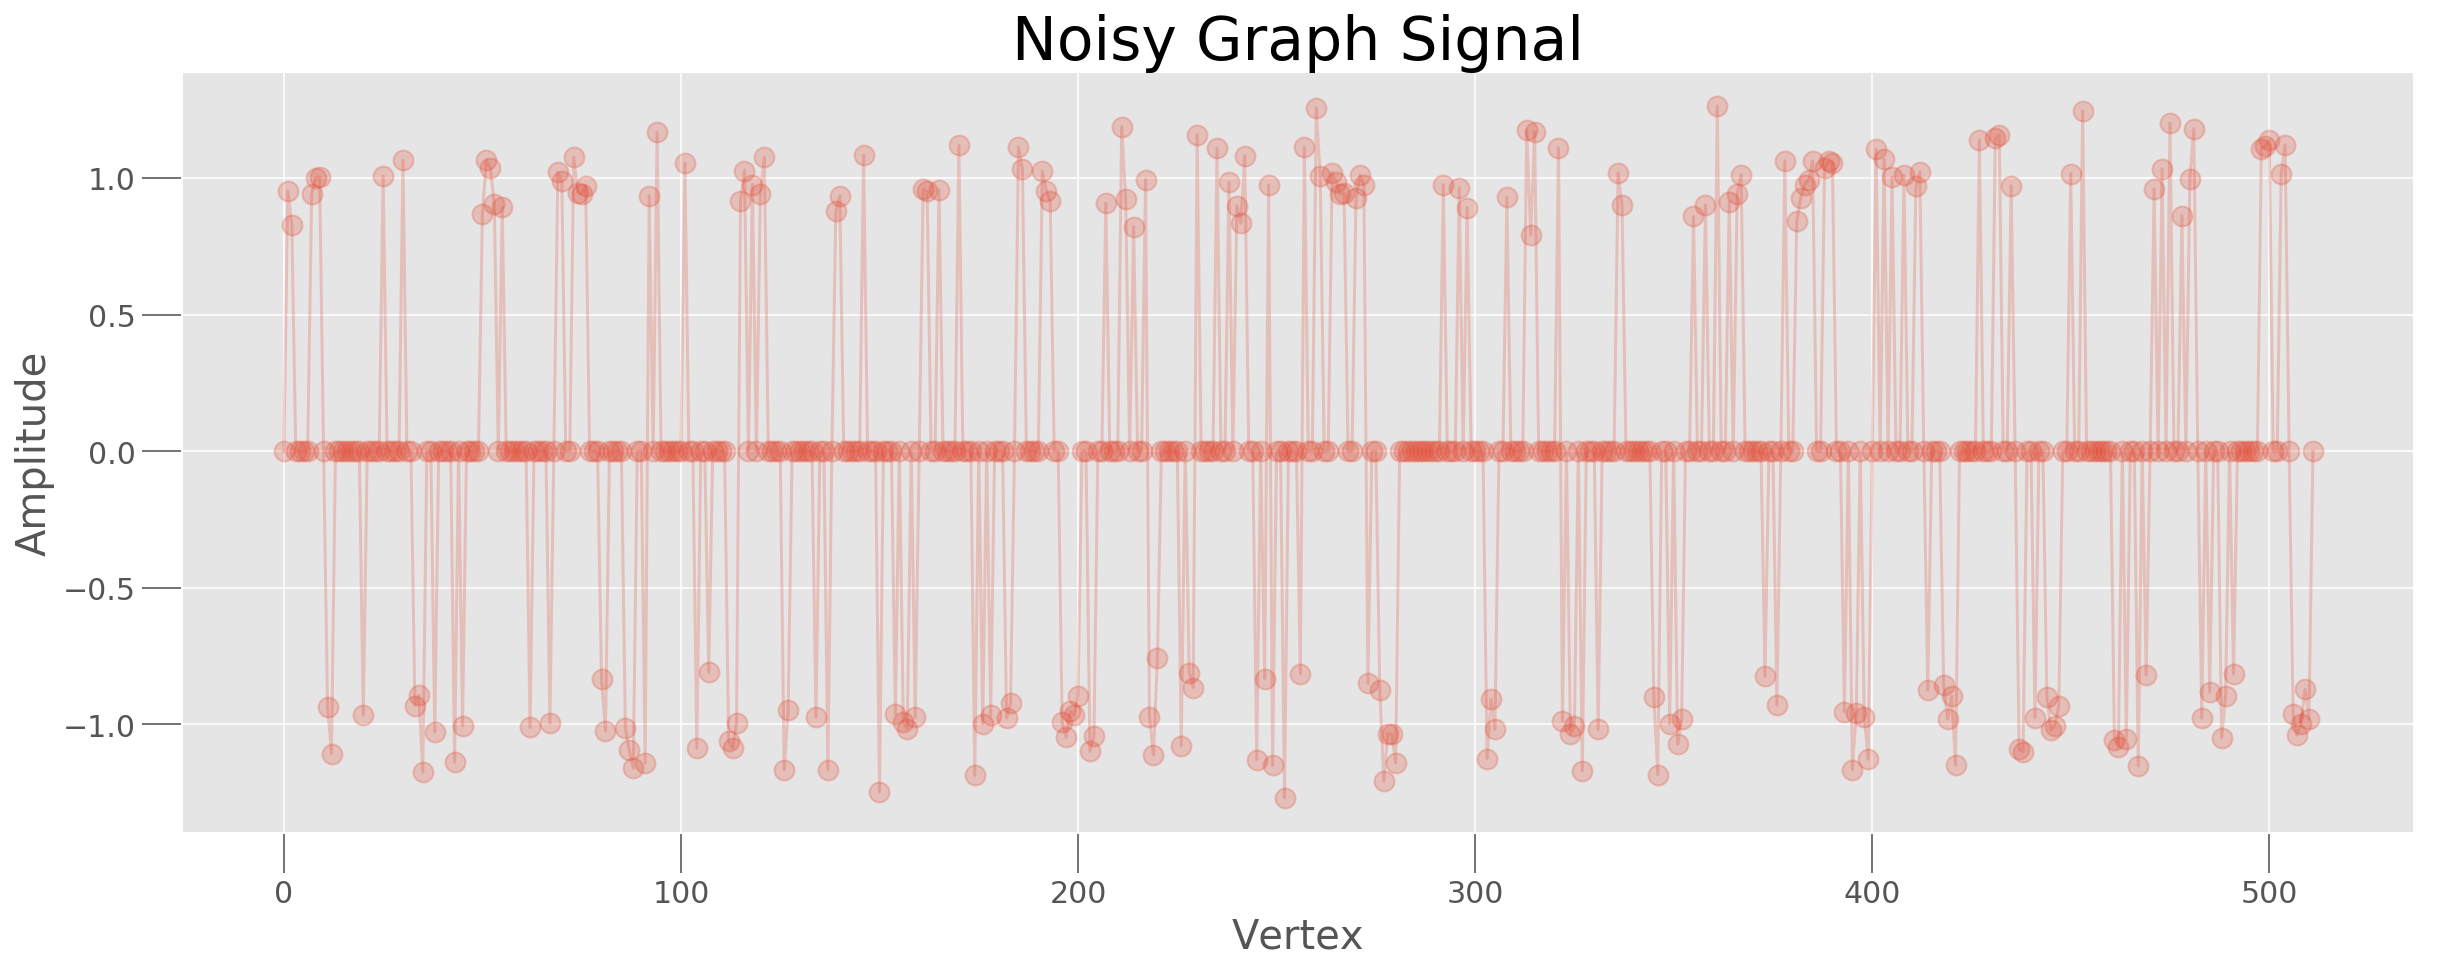

In [30]:
plt.figure(figsize=(20,7))
plt.plot(subsampled_noisy_label_signal,'-o',markersize=10,alpha=0.25)
plt.title('Noisy Graph Signal',size=30)
plt.xlabel('Vertex').set_size(20)
plt.ylabel('Amplitude').set_size(20)
plt.tick_params(size=20,labelsize=15)

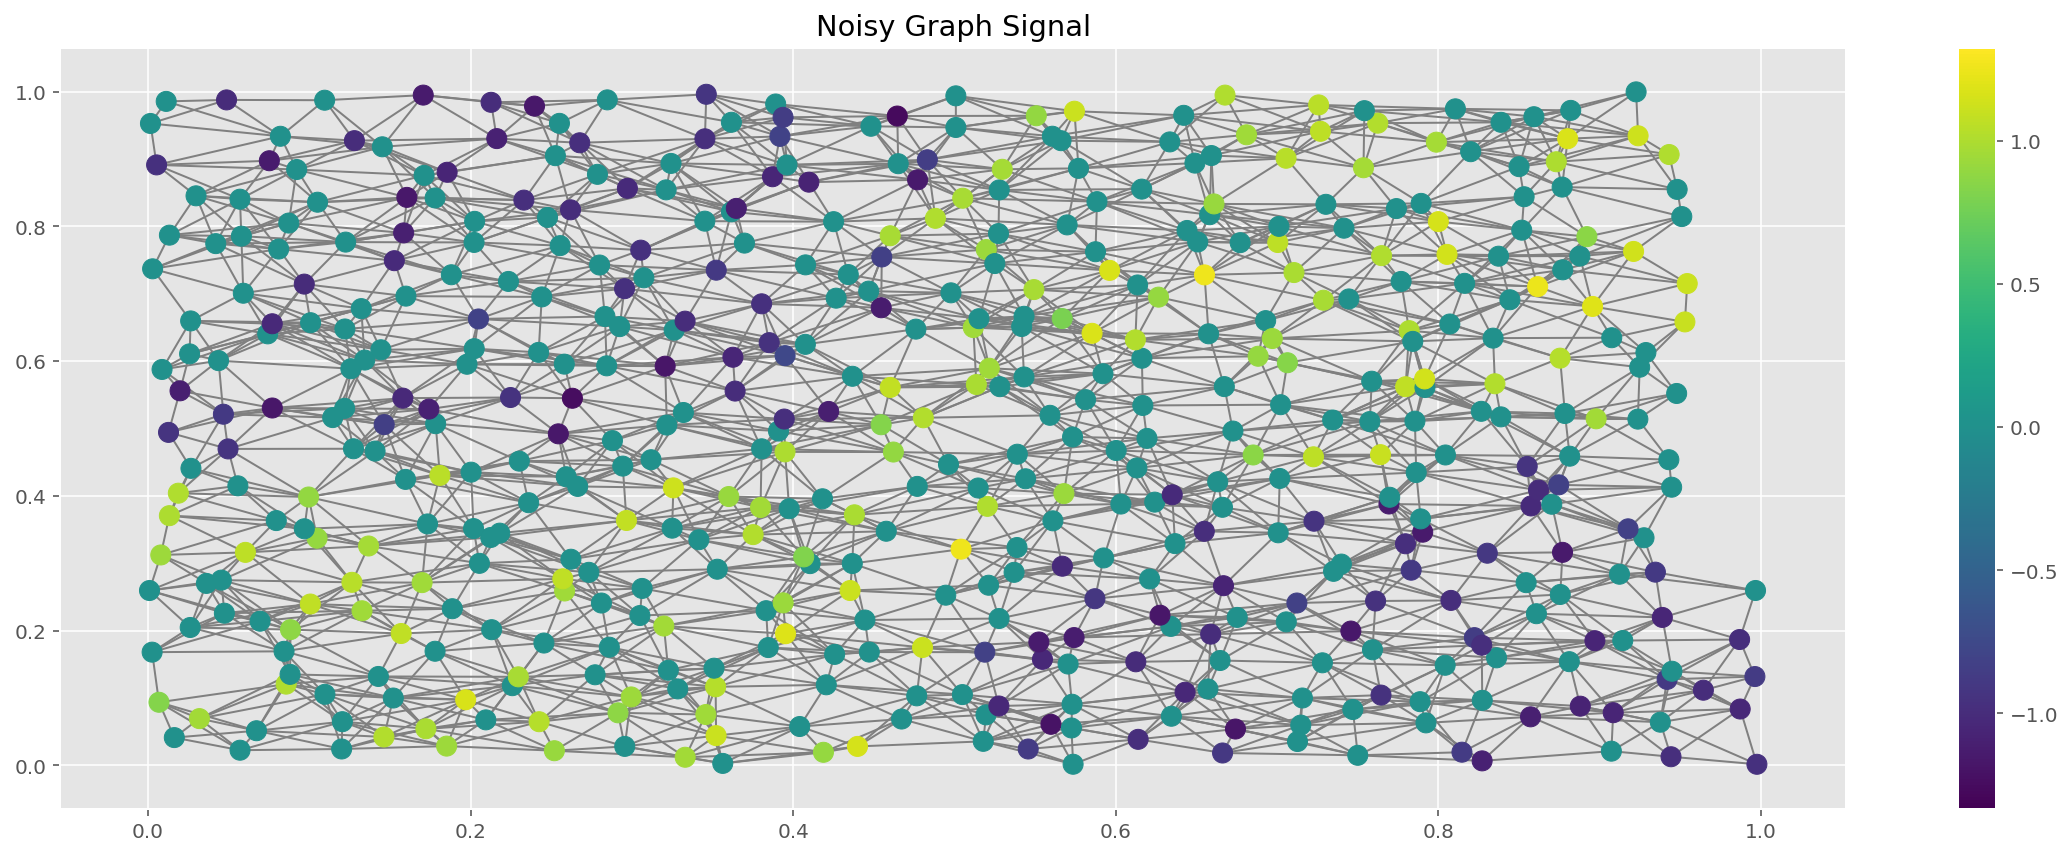

In [32]:
G.plot_signal(subsampled_noisy_label_signal,plot_name='Noisy Graph Signal')

In [34]:
import pyunlocbox

In [35]:
gamma = 3.0
d = pyunlocbox.functions.dummy()
r = pyunlocbox.functions.norm_l1()
f = pyunlocbox.functions.norm_l2(w=M, y=subsampled_noisy_label_signal,lambda_=gamma)

In [36]:
G.compute_differential_operator()
L = G.D.toarray()
step = 0.999 / (1 + np.linalg.norm(L))
solver = pyunlocbox.solvers.mlfbf(L=L, step=step)

In [37]:
x0 = subsampled_noisy_label_signal.copy()
prob1 = pyunlocbox.solvers.solve([d, r, f], solver=solver,x0=x0, rtol=0, maxit=1000)

Solution found after 1000 iterations:
    objective function f(sol) = 4.281638e+02
    stopping criterion: MAXIT


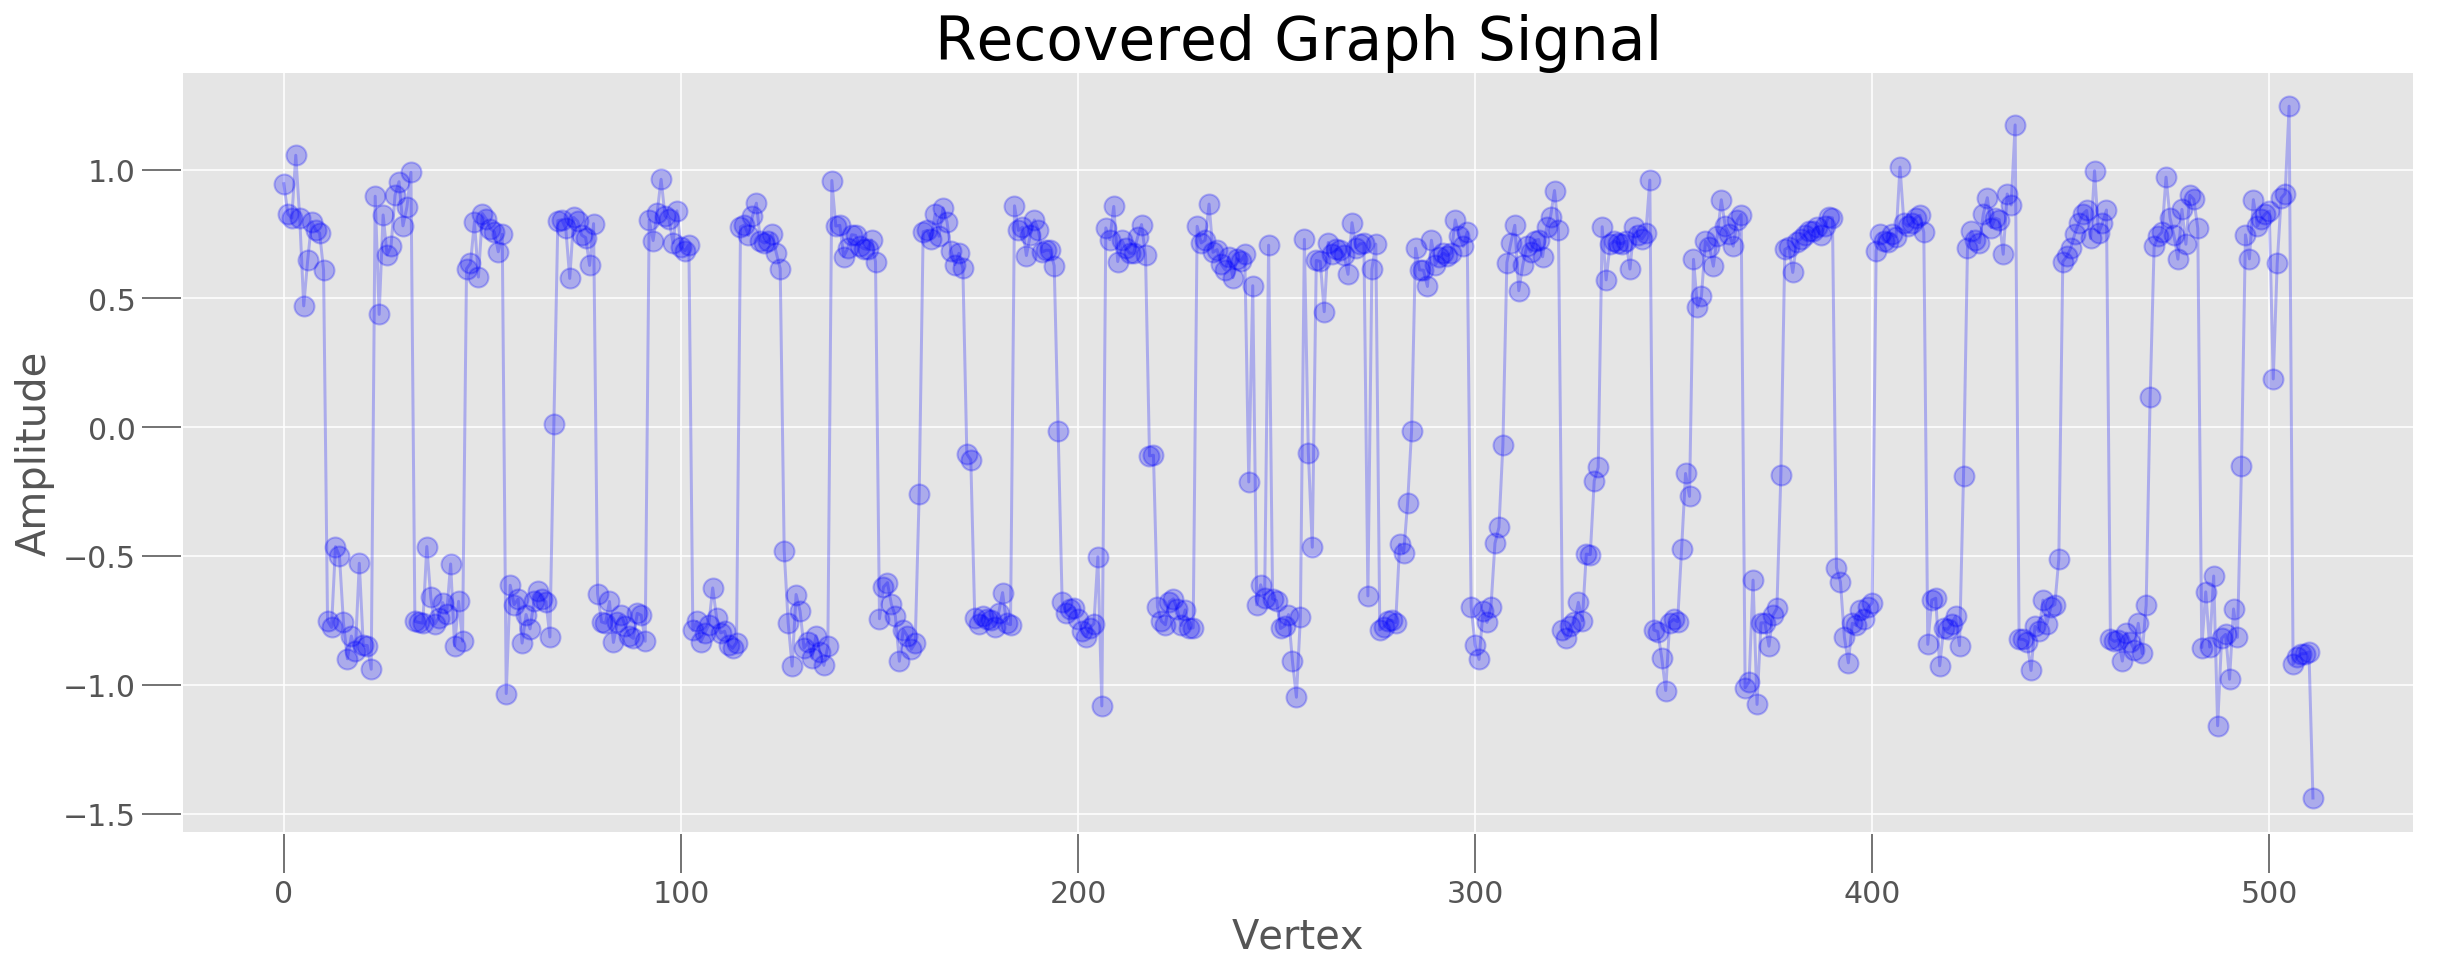

In [40]:
plt.figure(figsize=(20,7))
plt.plot(prob1['sol'],'-ob',markersize=10,alpha=0.25)
plt.title('Recovered Graph Signal',size=30)
plt.xlabel('Vertex').set_size(20)
plt.ylabel('Amplitude').set_size(20)
plt.tick_params(size=20,labelsize=15)

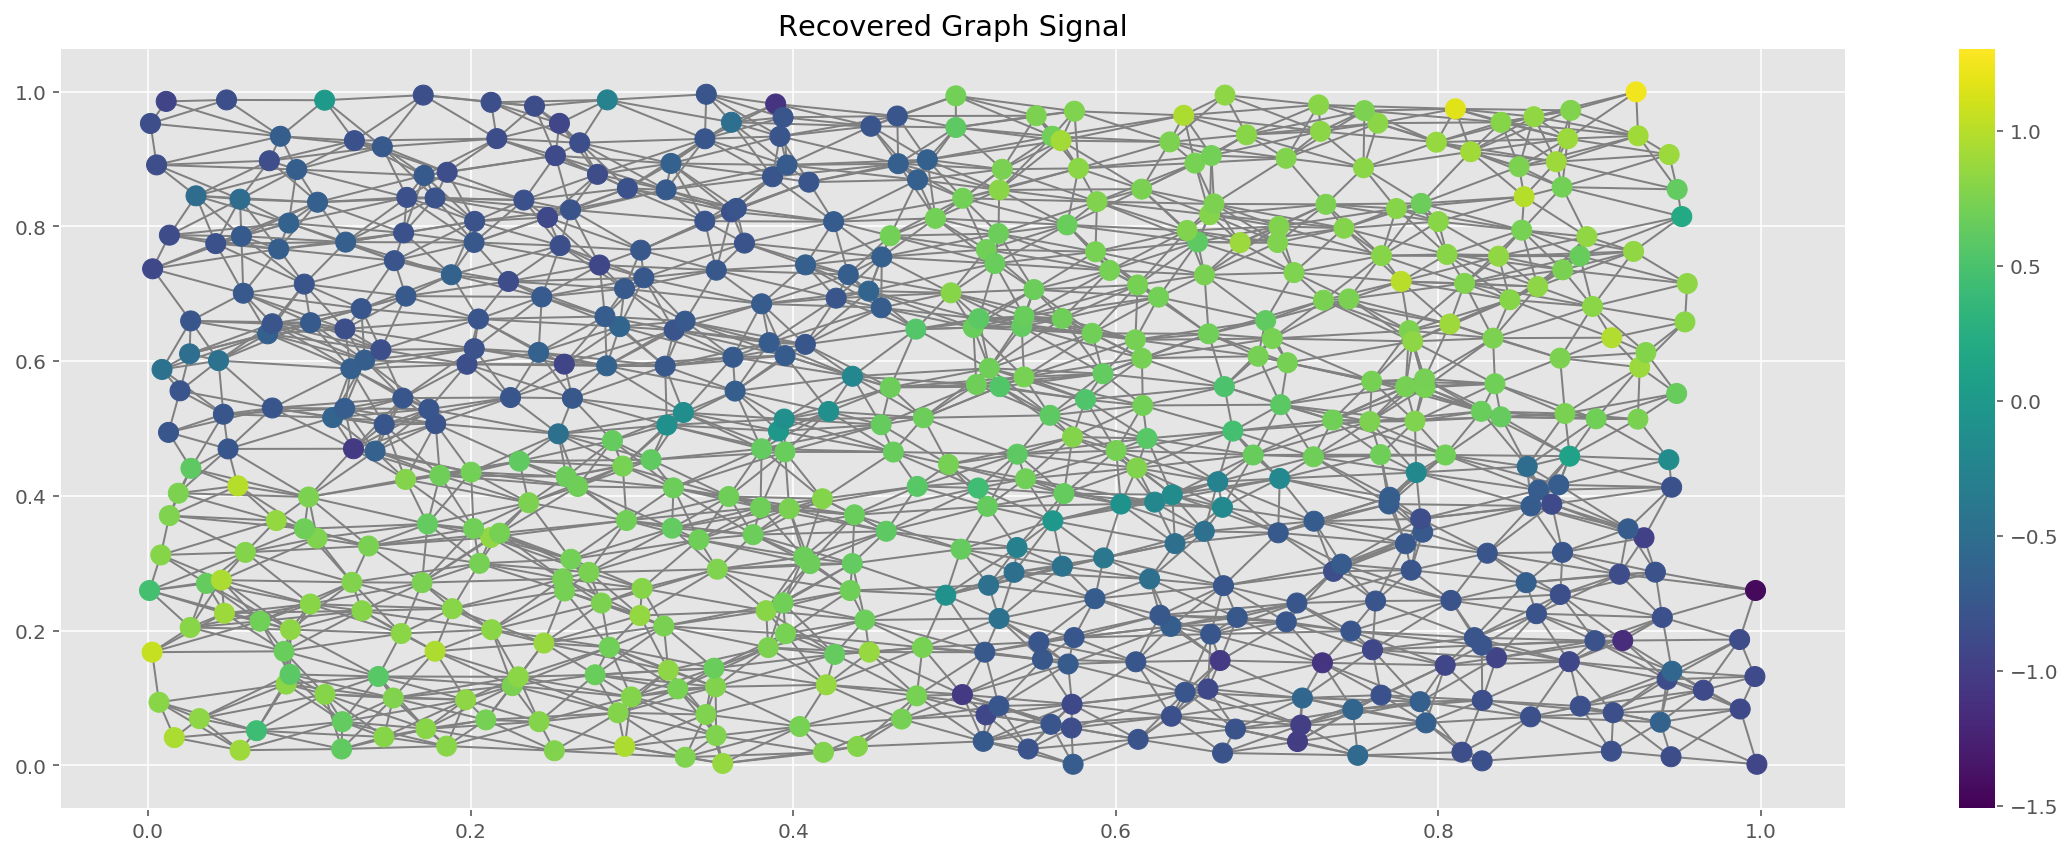

In [44]:
G.plot_signal(prob1['sol'],plot_name='Recovered Graph Signal')